## Netflix Data Cleaning using Pandas

In [1]:
import pandas as pd

Loading the csv dataset into a pandas df

In [2]:
data = pd.read_csv("netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


#### 1. Removing Redundant Columns 
>'rating': as i dont think it is of any use to me

In [4]:
#removing 'rating' column from the dataset
data = data.drop(columns="rating") # or we can do data.drop(columns="rating", inplace=True)
data.head()

,show_id,type,title,director,country,date_added,release_year,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"


#### 2. Renaming the columns
>Making the first letter of each column's name capital

In [ ]:
new_col_names = []

for col in data.columns:
    new_col_names.append(col.capitalize())

['Show_id', 'Type', 'Title', 'Director', 'Country', 'Date_added', 'Release_year', 'Duration', 'Listed_in']


In [6]:
print(new_col_names)

['Show_id', 'Type', 'Title', 'Director', 'Country', 'Date_added', 'Release_year', 'Duration', 'Listed_in']


In [7]:
data.columns = new_col_names
data.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"


### 3. Checking for and removing duplicates

In [ ]:
print(data.duplicated().sum()) #there are no duplicate rows, but if present we can drop them using below statement
# data.drop_duplicates(inplace=True)

0


#### 4. Checking for null values

In [ ]:
data.isna().sum() # this dataset doesnt have any null values

Show_id         0
Type            0
Title           0
Director        0
Country         0
Date_added      0
Release_year    0
Duration        0
Listed_in       0
dtype: int64

#### 5. Resolving columns' data types

In [13]:
data.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"


- In the Show_id column the entries are like s1, s2, s3 etc. So removing s from them to create consistent int id values for better analysis

In [16]:
data["Show_id"] = data["Show_id"].apply(lambda x: x.split("s")[1])

In [17]:
data.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Listed_in
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"


- Changing the Show_id dtype to numeric(int)

In [20]:
data.dtypes["Show_id"] # we can see its an object type or str

dtype('O')

In [21]:
data["Show_id"] = data["Show_id"].astype(int)
data.dtypes["Show_id"]

dtype('int64')

In [22]:
data.head()

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Listed_in
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"


- Changing 'Date_added' column dtype to datetime

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       8790 non-null   int64 
 1   Type          8790 non-null   object
 2   Title         8790 non-null   object
 3   Director      8790 non-null   object
 4   Country       8790 non-null   object
 5   Date_added    8790 non-null   object
 6   Release_year  8790 non-null   int64 
 7   Duration      8790 non-null   object
 8   Listed_in     8790 non-null   object
dtypes: int64(2), object(7)
memory usage: 618.2+ KB


In [27]:
data["Date_added"] = pd.to_datetime(data["Date_added"], format='%m/%d/%Y')
data.head(10)

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Listed_in
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,125 min,"Dramas, Independent Movies, International Movies"
5,9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,9 Seasons,"British TV Shows, Reality TV"
6,10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,104 min,"Comedies, Dramas"
7,939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,13,Movie,Je Suis Karl,Christian Schwochow,Germany,2021-09-23,2021,127 min,"Dramas, International Movies"
9,940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,2021-05-01,2013,76 min,"Children & Family Movies, Music & Musicals"


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_id       8790 non-null   int64         
 1   Type          8790 non-null   object        
 2   Title         8790 non-null   object        
 3   Director      8790 non-null   object        
 4   Country       8790 non-null   object        
 5   Date_added    8790 non-null   datetime64[ns]
 6   Release_year  8790 non-null   int64         
 7   Duration      8790 non-null   object        
 8   Listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 618.2+ KB


In [28]:
data.isnull().sum()

Show_id         0
Type            0
Title           0
Director        0
Country         0
Date_added      0
Release_year    0
Duration        0
Listed_in       0
dtype: int64

### Data Analysis & Visualization

In [29]:
import matplotlib.pyplot as plt

1. Distribution of Movie and TV Show Types
> Comparing the number of TV Shows vs Movies in the dataset using a pie chart

In [31]:
type_counts = data['Type'].value_counts()
print(type_counts)

Type
Movie      6126
TV Show    2664
Name: count, dtype: int64


Text(0.5, 1.0, 'Dsitribution of Movies and Tv Shows in the dataset')

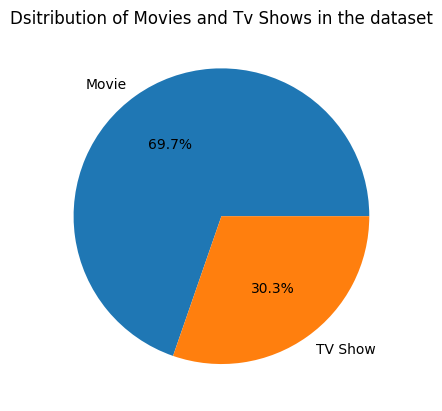

In [36]:
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title("Dsitribution of Movies and Tv Shows in the dataset")

2. Top 10 Most Popular Directors (based on number of titles in the dataset) using bar plot

In [47]:
top_directors = data["Director"].value_counts()
top_directors = top_directors[top_directors.index != "Not Given"].head(10) #remove titles without any director name
print(top_directors)

Director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Name: count, dtype: int64


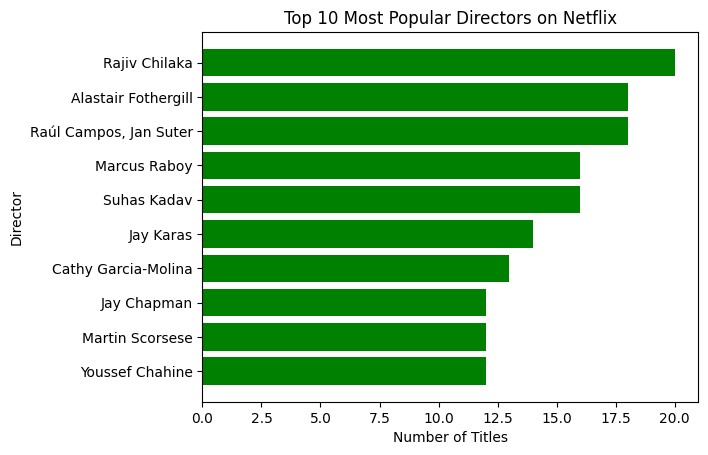

In [45]:
plt.barh(top_directors.index, top_directors.values, color="green")
plt.title('Top 10 Most Popular Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().invert_yaxis()

3. Top 10 Countries with the Most Titles using a Bar Plot

In [ ]:
top_10_countries = data["Country"].value_counts().head(10)
print(top_10_countries)

Country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


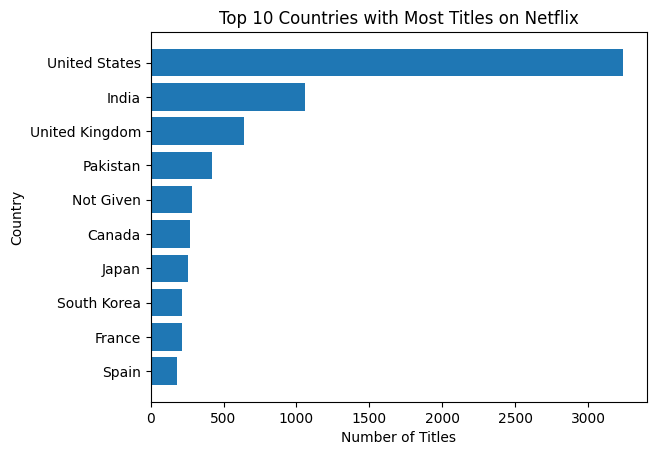

In [52]:
plt.barh(top_10_countries.index, top_10_countries.values)
plt.title('Top 10 Countries with Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.gca().invert_yaxis()


4. Top 5 Categories in 'Listed_in' or Top 5 Genres using Bar Plot

In [58]:
cats = data['Listed_in'].str.split(', ').explode()
top_5_cats = cats.value_counts().head(5)
print(cats)

0                Documentaries
1               Crime TV Shows
1       International TV Shows
1        TV Action & Adventure
2                    TV Dramas
                 ...          
8787    International TV Shows
8787         Romantic TV Shows
8787                 TV Dramas
8788                  Kids' TV
8789                  Kids' TV
Name: Listed_in, Length: 19294, dtype: object


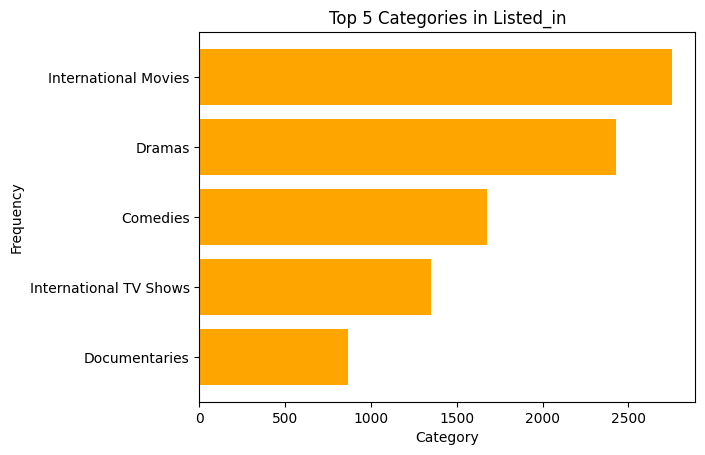

In [ ]:
plt.barh(top_5_cats.index, top_5_cats.values, color="orange")
plt.title('Top 5 Categories in Listed_in')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.gca().invert_yaxis() #to display highest at the top